<a href="https://colab.research.google.com/github/IndraAndriansyah/Car-Prices-Data-Predict/blob/main/CarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path dari google drive
file_path = '/content/drive/MyDrive/car_prices.csv'

# membaca dataset csv menjadi dataframe
df = pd.read_csv(file_path)

# menampilkan lima baris pertama dari dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
df = df.fillna(df[['condition', 'odometer', 'mmr', 'sellingprice']].mean()).round(1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# plt.figure(figsize=(14, 8))
# sns.set_style("whitegrid")

Text(0, 0.5, 'Average Selling Price')

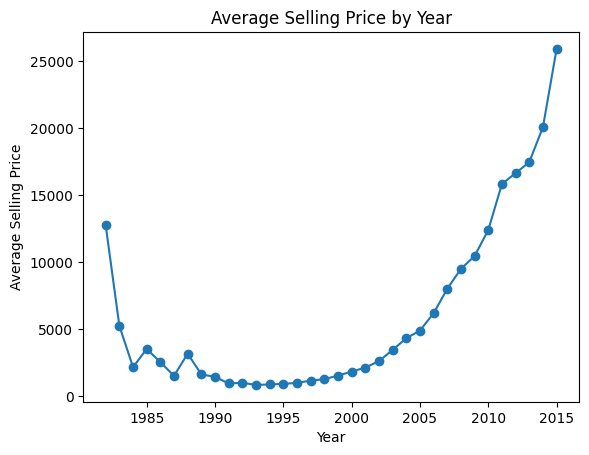

In [ ]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean()
# plt.subplot(2, 2, 1)
avg_price_by_year.plot(kind='line', marker='o')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')

Text(0, 0.5, '')

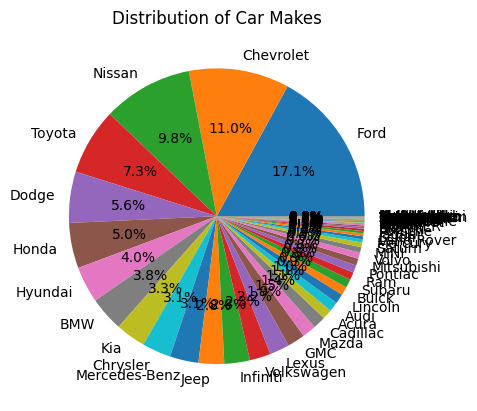

In [ ]:
make_counts = df['make'].value_counts()
make_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Car Makes')
plt.ylabel('')

Text(0.5, 1.0, 'Correlation Heatmap')

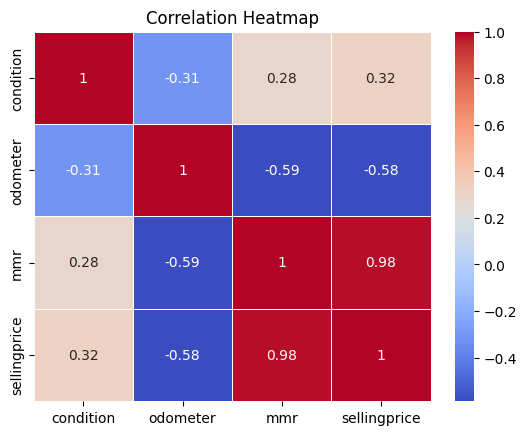

In [ ]:
correlation_matrix = df[['condition', 'odometer', 'mmr', 'sellingprice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

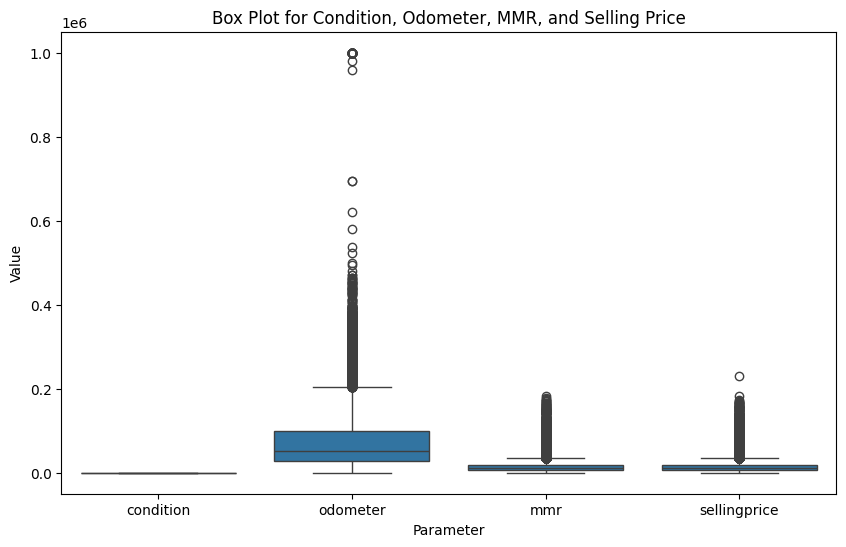

In [ ]:
# Create a box plot for the four parameters: condition, odometer, mmr, sellingprice
plt.figure(figsize=(10, 6))

# Melt the dataframe to long-form for seaborn boxplot
melted_df = df[['condition', 'odometer', 'mmr', 'sellingprice']].melt()

# Create the box plot
sns.boxplot(x='variable', y='value', data=melted_df)
plt.title('Box Plot for Condition, Odometer, MMR, and Selling Price')
plt.xlabel('Parameter')
plt.ylabel('Value')

# Display the plot
plt.show()


In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clipping the data
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


columns_to_clean = ['condition', 'odometer', 'mmr', 'sellingprice']
remove_outliers(df, columns_to_clean)


In [ ]:
# fig, axs = plt.subplots(2, len(columns_to_clean), figsize=(15, 10))

# for i, column in enumerate(columns_to_clean):
#     axs[0, i].boxplot(df[column])
#     axs[0, i].set_title(f'Before - {column}')

# # Apply outlier removal
# remove_outliers(df, columns_to_clean)

# # Visualize after removing outliers
# for i, column in enumerate(columns_to_clean):
#     axs[1, i].boxplot(df[column])
#     axs[1, i].set_title(f'After - {column}')

# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X = df[['condition', 'odometer', 'mmr']]
y = df[['sellingprice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
# scaler_target = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

decision tree regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
params = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "max_features": [0.5, 0.75, 1.0],
}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'neg_mean_absolute_error',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 10, 'max_features': 1.0, 'min_samples_split': 10}

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

y_pred = grid.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
print(f'R-squared (R²): {round(r2, 2)}')
print(f'Mean Squared Error (MSE): {round(mse, 2)}')

Mean Absolute Error (MAE): 924.37
R-squared (R²): 0.97
Mean Squared Error (MSE): 2010181.04


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model2 = RandomForestRegressor()
# params = {
#     "max_depth": [3, 5, 7],
#     "min_samples_split": [2, 5, 10],
#     "max_features": [0.5, 0.75, 1.0],
# }
# #END CODE

# #Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(
#              estimator= model2,
#              param_grid= params,
#              scoring = 'neg_mean_absolute_error',
#              n_jobs = 10, # core cpu yang digunakan
#              cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
#             )

# grid.fit(x_train,y_train)
# grid.best_params_

In [ ]:
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# y_pred = grid.predict(x_test)

# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
# print(f'R-squared (R²): {round(r2, 2)}')
# print(f'Mean Squared Error (MSE): {round(mse, 2)}')

linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
print(f'R-squared (R²): {round(r2, 2)}')
print(f'Mean Squared Error (MSE): {round(mse, 2)}')

Mean Absolute Error (MAE): 1002.5
R-squared (R²): 0.97
Mean Squared Error (MSE): 2359813.76


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

y_pred = knn.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
print(f'R-squared (R²): {round(r2, 2)}')
print(f'Mean Squared Error (MSE): {round(mse, 2)}')

Mean Absolute Error (MAE): 1002.17
R-squared (R²): 0.97
Mean Squared Error (MSE): 2254147.62


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# model3 = GradientBoostingClassifier()
# params = {
#     "max_depth": [3, 5, 7],
#     "min_samples_split": [2, 5, 10],
#     "max_features": [0.5, 0.75, 1.0],
# }

# #END CODE

# #Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(
#              estimator= model3,
#              param_grid= params,
#              scoring = 'accuracy',
#              n_jobs = 10, # core cpu yang digunakan
#              cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
#             )

# grid.fit(X_train,y_train)
# grid.best_params_